**Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.**

->Anomaly detection is the process of finding data points that do not follow the normal pattern of the dataset.

Point anomaly: A single unusual value. Example: one taxi fare recorded as 1000 Rs while most fares are under 50 Rs.

Contextual anomaly: A value that is unusual only in a certain context. Example: high electricity usage at 3 AM when normally it should be low.

Collective anomaly: A group of points that together look abnormal. Example: sudden drop in website traffic for a whole week.


**Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.**

->

* Isolation Forest:
1. Works by randomly splitting data into smaller subsets.
2. Anomalies are easier to isolate because they require fewer splits.
Use case: High-dimensional data like credit card fraud detection.

* DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
1. Groups data into dense clusters and marks points in sparse areas as outliers.
Use case: Geographical data, customer segmentation, spatial anomalies.

* LOF (Local Outlier Factor):
1. Measures how dense a point is compared to its neighbors.
2. If density is much lower, it’s considered an outlier.
Use case: When local behavior matters, like detecting abnormal behavior in user activity logs.

**Question 3: What are the key components of a Time Series? Explain each with one example.**

->
* Trend: Long-term direction of the series.
Example: Increase in the number of mobile phone users over years.

* Seasonality: Patterns that repeat at regular intervals.
Example: Ice cream sales peak in summer and drop in winter.

* Cyclic: Irregular up and down movements over long time periods, often linked to business or economic cycles.
Example: Rise and fall of housing prices.

* Residual/Noise: Random variations that cannot be explained by trend or seasonality.
Example: Sudden sales spike during a festival that is not part of normal seasonality.

**Question 4: Define Stationary in time series.How can you test and transform a non-stationary series into a stationary one?**

->A stationary series has constant mean, variance, and autocorrelation over time. Most time series models like ARIMA assume stationarity.

*How to test:*

- Plot rolling mean and rolling variance.

Perform Augmented Dickey–Fuller (ADF) test. If p-value < 0.05, series is stationary.

*How to transform:*

- Differencing: Subtract current value from previous value.

- Log/Power transformation: Reduces variance.

- Detrending: Remove the trend component.

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.**

->
* AR (AutoRegressive): Uses past values to predict future values.
Example: Predicting today’s sales from the last few days’ sales.

* MA (Moving Average): Uses past forecast errors to make predictions.
Example: Predicting temperature by smoothing error terms.

* ARIMA: Combines AR + MA + differencing for non-stationary series.
Example: Stock market forecasting.

* SARIMA: Extends ARIMA by adding seasonal terms.
Example: Airline passenger numbers with monthly seasonality.

* SARIMAX: SARIMA plus external features (exogenous variables).
Example: Predicting energy demand using past demand + temperature.


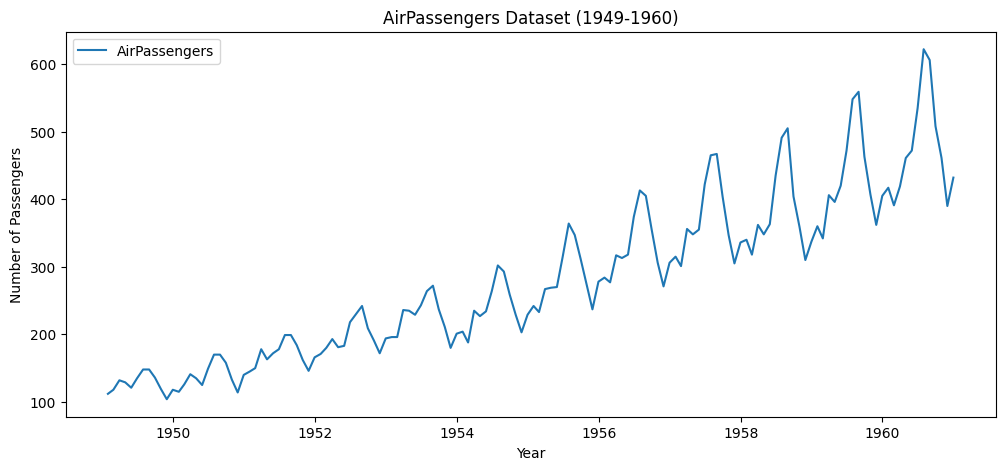

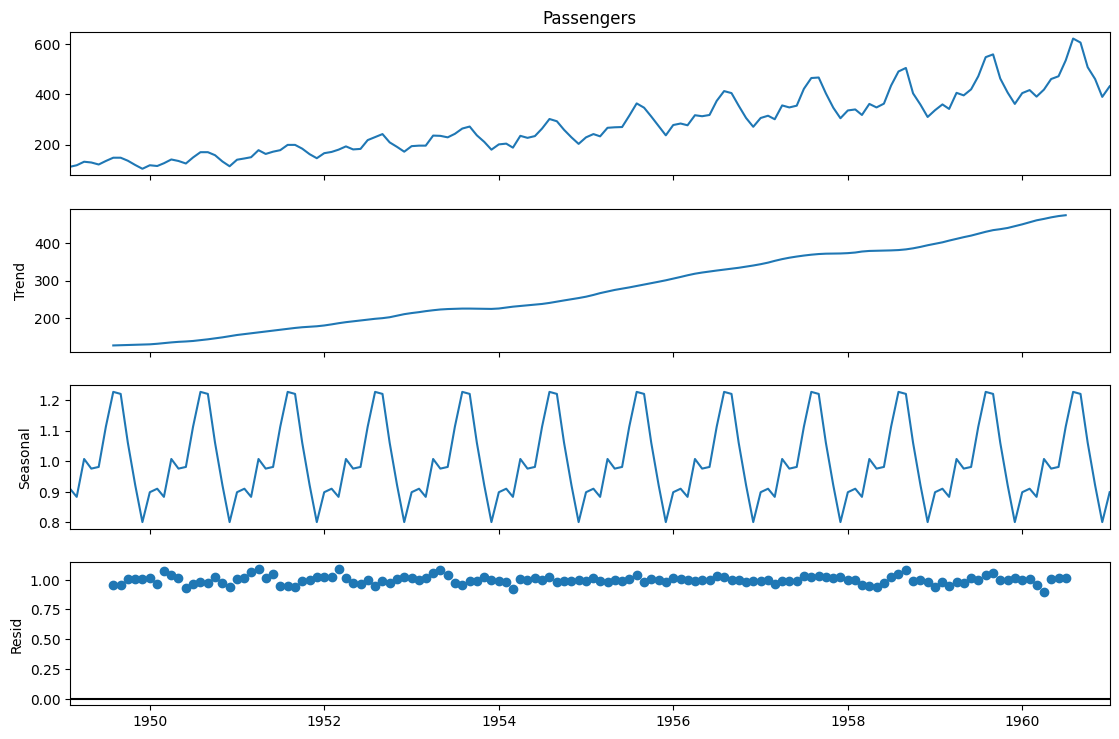

In [2]:

'''
Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components
(Include your Python code and output in the code box below.)
'''

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

# Load the AirPassengers dataset

data = get_rdataset("AirPassengers").data

# Convert to datetime format
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='ME')
data.rename(columns={'value': 'Passengers'}, inplace=True)

# Set time as index
data.set_index('time', inplace=True)

# Plot original series
plt.figure(figsize=(12, 5))
plt.plot(data['Passengers'], label="AirPassengers")
plt.title("AirPassengers Dataset (1949-1960)")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

# Decompose the series
decomposition = seasonal_decompose(data['Passengers'], model='multiplicative')

# Plot decomposition
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()


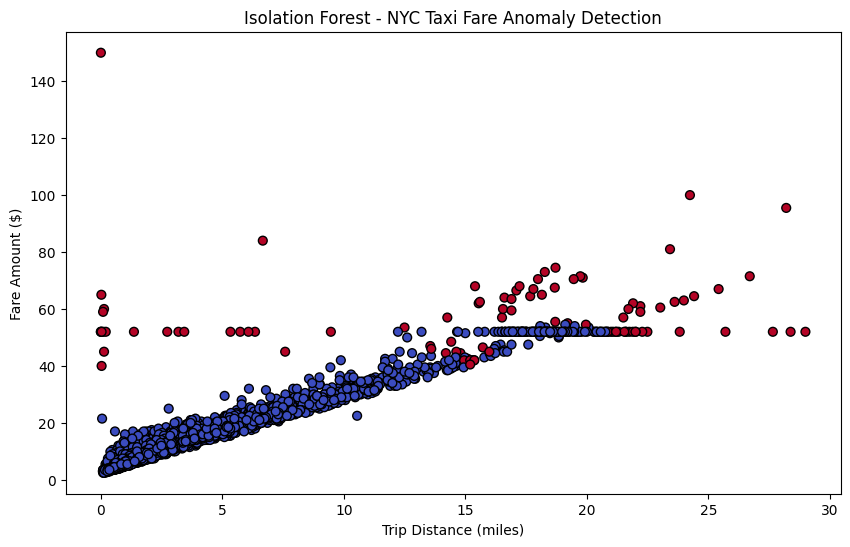

In [4]:
'''
Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.
(Include your Python code and output in the code box below.)
'''

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load NYC Taxi Fare dataset (replace with your file path)
df = df = pd.read_csv("/content/sample_data/NYC_taxi_fare_data.csv")


# Keep only relevant columns
df = df[['fare_amount', 'trip_distance']]

# Drop missing or invalid values
df = df.dropna()
df = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)]

# Take a random sample for visualization
df_sample = df.sample(n=5000, random_state=42)

# Apply Isolation Forest
iso = IsolationForest(contamination=0.02, random_state=42)
df_sample['anomaly'] = iso.fit_predict(df_sample[['fare_amount', 'trip_distance']])

# Map -1 = anomaly, 1 = normal
df_sample['anomaly'] = df_sample['anomaly'].map({1: 0, -1: 1})

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(df_sample['trip_distance'], df_sample['fare_amount'],
            c=df_sample['anomaly'], cmap='coolwarm', marker='o', s=40, edgecolor='k')

plt.title("Isolation Forest - NYC Taxi Fare Anomaly Detection")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.show()


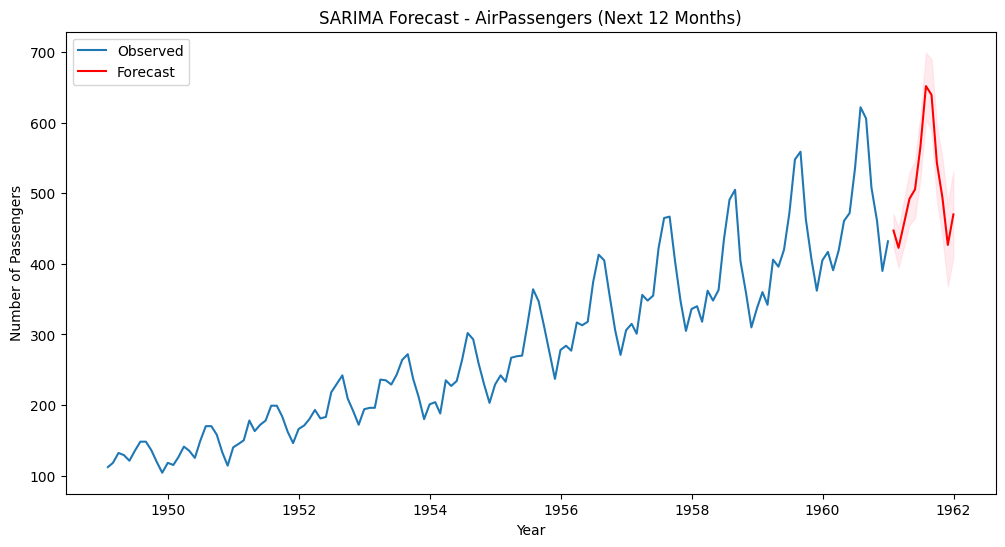

In [8]:
'''
Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.
(Include your Python code and output in the code box below.)
'''

# Question 8: Train a SARIMA model on the monthly airline passengers dataset.
# Forecast the next 12 months and visualize the results.

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.datasets import get_rdataset

# Load AirPassengers dataset
data = get_rdataset("AirPassengers").data

# Convert to datetime format
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='ME')
data.rename(columns={'value': 'Passengers'}, inplace=True)

# Set datetime as index
data.set_index('time', inplace=True)

# Explicitly set frequency to avoid warnings
data = data.asfreq('ME')

# Train SARIMA model
# (p,d,q) = (1,1,1), seasonal (P,D,Q,12) → common choice for this dataset
model = SARIMAX(data['Passengers'],
                order=(1,1,1),
                seasonal_order=(1,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='ME')
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Passengers'], label="Observed")
plt.plot(forecast_index, forecast_values, label="Forecast", color="red")
plt.fill_between(forecast_index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1],
                 color='pink', alpha=0.3)
plt.title("SARIMA Forecast - AirPassengers (Next 12 Months)")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()


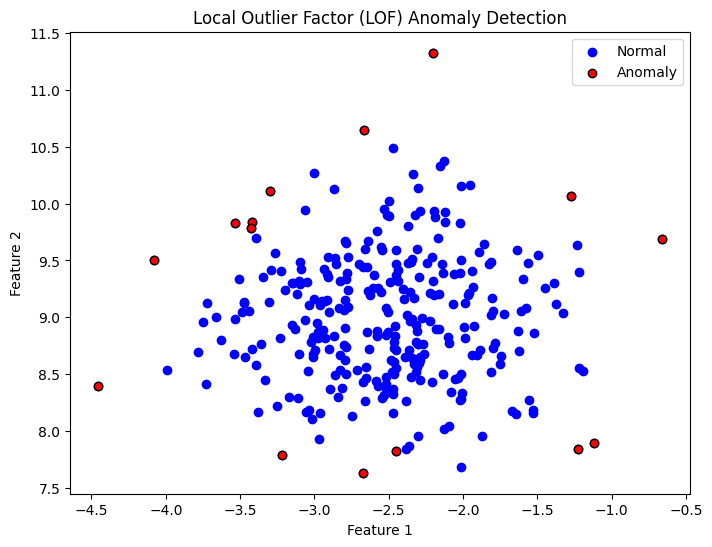

In [9]:
'''
Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.
(Include your Python code and output in the code box below.)
'''
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.neighbors import LocalOutlierFactor

# Generate synthetic dataset
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.6, random_state=42)

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)

# Map -1 = anomaly, 1 = normal
anomalies = (y_pred == -1)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c='blue', label="Normal")
plt.scatter(X[anomalies, 0], X[anomalies, 1], c='red', label="Anomaly", edgecolor='k')
plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


**Question 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.**

Explain your real-time data science workflow:
* How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
*  Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
* How would you validate and monitor the performance over time?
* How would this solution help business decisions or operations?*

**Answer:**

Anomaly Detection:
* Since the data is collected every 15 minutes and can have sudden spikes/drops, I would use Isolation Forest because it works well with high-dimensional and streaming data.

* Alternatively, LOF can capture local density-based anomalies, while DBSCAN could work if I want to cluster patterns. But Isolation Forest is best suited for real-time anomaly detection in streaming environments.

Short-Term Forecasting Model:

* For short-term demand forecasting, I would use SARIMAX.

* Reason: Energy demand is affected not only by past consumption (time series patterns) but also by external factors like weather and region, and SARIMAX allows adding these exogenous variables.

* This makes it more accurate than ARIMA or SARIMA in this context.

Validation and Monitoring:

* I would split the data into training and test sets using rolling/expanding windows to simulate real-time forecasts.

* Metrics like MAPE (Mean Absolute Percentage Error) and RMSE (Root Mean Square Error) would track performance.

* A dashboard would continuously monitor forecast accuracy and anomaly detection results, retraining the model periodically as new data arrives.

Business Impact:

* Early anomaly detection helps operators quickly react to unusual demand spikes or drops (e.g., equipment failures, fraud, or sudden demand surges).

* Accurate short-term forecasting supports load balancing, reducing the risk of blackouts and ensuring stable supply.

* This improves decision-making for energy pricing, scheduling maintenance, and optimizing power distribution across regions.

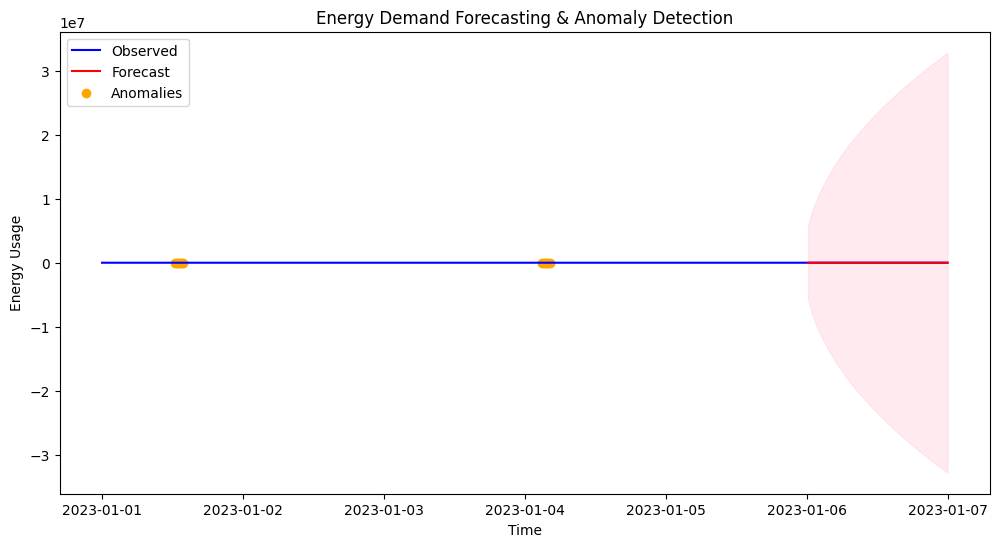

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')
# ----------------------------
# Step 1: Simulate streaming dataset (15-min interval)
# ----------------------------
date_rng = pd.date_range(start="2023-01-01", end="2023-01-07", freq="15min")  # one week of data
np.random.seed(42)

data = {
    "timestamp": date_rng,
    "region": np.random.choice(["North", "South", "East", "West"], size=len(date_rng)),
    "weather_temp": np.random.normal(25, 5, size=len(date_rng)),  # synthetic weather
    "energy_usage": np.random.normal(200, 20, size=len(date_rng))  # baseline usage
}

df = pd.DataFrame(data)

# Inject anomalies (spikes/drops)
df.loc[50:55, "energy_usage"] *= 3   # big spike
df.loc[300:305, "energy_usage"] *= 0.2  # sudden drop

# ----------------------------
# Step 2: Detect anomalies with Isolation Forest
# ----------------------------
iso = IsolationForest(contamination=0.02, random_state=42)
df["anomaly"] = iso.fit_predict(df[["energy_usage"]])

# ----------------------------
# Step 3: Train SARIMAX model (short-term forecasting)
# ----------------------------
df = df.set_index("timestamp").asfreq("15min")   # explicitly set frequency

train = df.iloc[:-96]   # train on all but last day
test = df.iloc[-96:]    # forecast last day (96 points = 24h @ 15min)

model = SARIMAX(train["energy_usage"],
                order=(1,1,1),
                seasonal_order=(1,1,1,96),   # 96 lags = 1 day seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

forecast = results.get_forecast(steps=96)
pred_ci = forecast.conf_int()

# ----------------------------
# Step 4: Visualization
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(df.index, df["energy_usage"], label="Observed", color="blue")
plt.plot(test.index, forecast.predicted_mean, label="Forecast", color="red")
plt.fill_between(test.index,
                 pred_ci.iloc[:,0],
                 pred_ci.iloc[:,1],
                 color="pink", alpha=0.3)
plt.scatter(df.index[df["anomaly"]==-1], df["energy_usage"][df["anomaly"]==-1],
            color="orange", label="Anomalies")
plt.title("Energy Demand Forecasting & Anomaly Detection")
plt.xlabel("Time")
plt.ylabel("Energy Usage")
plt.legend()
plt.show()
